In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from google.colab import files
import os
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
dirname = '/content/drive/MyDrive/chessman/Chessman-image-dataset'
dir_chess_folders = os.listdir(dirname)
dir_chess_paths = [os.path.join(dirname, path) for path in dir_chess_folders]
print(dir_chess_folders)
print(dir_chess_paths)

['Knight', 'Bishop', 'King', 'Pawn', 'Queen', 'Rook']
['/content/drive/MyDrive/chessman/Chessman-image-dataset/Knight', '/content/drive/MyDrive/chessman/Chessman-image-dataset/Bishop', '/content/drive/MyDrive/chessman/Chessman-image-dataset/King', '/content/drive/MyDrive/chessman/Chessman-image-dataset/Pawn', '/content/drive/MyDrive/chessman/Chessman-image-dataset/Queen', '/content/drive/MyDrive/chessman/Chessman-image-dataset/Rook']


In [ ]:
img_size_h = 180
img_size_w = 180

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=70, 
    horizontal_flip=True,
    vertical_flip=True
    )

input_shape = (img_size_h, img_size_w, 3) 
epoch = 50
train_generator = train_datagen.flow_from_directory(
    directory=dirname,
    target_size=(img_size_h, img_size_w),
    subset='training',
    class_mode="sparse",
    shuffle=True, 
    seed=8)

validation_generator = train_datagen.flow_from_directory(
    directory=dirname,
    target_size=(img_size_h, img_size_w),
    subset='validation',
    class_mode="sparse",
    shuffle=True,
    seed=8)

Found 341 images belonging to 6 classes.
Found 142 images belonging to 6 classes.


In [ ]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_size_w,img_size_h,3)))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(3, strides=2, padding="same"))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(3, strides=2, padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(3, strides=2, padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(3, strides=2, padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(3, strides=2, padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])



In [ ]:
model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization_51 (Batc (None, 178, 178, 32)      128       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
batch_normalization_52 (Batc (None, 87, 87, 64)        256       
_________________________________________________________________
dropout_18 (Dropout)         (None, 87, 87, 64)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 44, 44, 64)       

In [ ]:
r = model.fit(
    train_generator, epochs=epoch, validation_data=validation_generator
)

Epoch 1/50
11/11 [==============================] - 50s 4s/step - loss: 2.3958 - accuracy: 0.1922 - val_loss: 1.7838 - val_accuracy: 0.1831
Epoch 2/50
11/11 [==============================] - 49s 4s/step - loss: 2.1452 - accuracy: 0.1962 - val_loss: 1.8424 - val_accuracy: 0.1901
Epoch 3/50
11/11 [==============================] - 48s 4s/step - loss: 2.0064 - accuracy: 0.2113 - val_loss: 1.7838 - val_accuracy: 0.1761
Epoch 4/50
11/11 [==============================] - 48s 4s/step - loss: 1.8457 - accuracy: 0.2553 - val_loss: 1.9997 - val_accuracy: 0.1901
Epoch 5/50
11/11 [==============================] - 48s 4s/step - loss: 1.8711 - accuracy: 0.2625 - val_loss: 2.0208 - val_accuracy: 0.1831
Epoch 6/50
11/11 [==============================] - 48s 4s/step - loss: 1.7723 - accuracy: 0.2755 - val_loss: 2.2345 - val_accuracy: 0.1901
Epoch 7/50
11/11 [==============================] - 48s 4s/step - loss: 1.7558 - accuracy: 0.3174 - val_loss: 2.3508 - val_accuracy: 0.1901
Epoch 8/50
11/11 [==

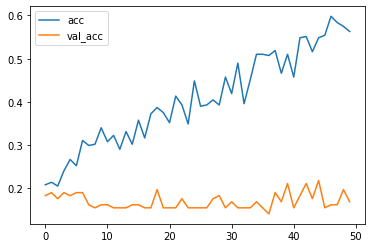

In [ ]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

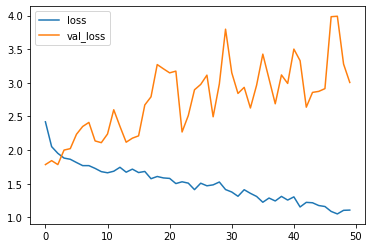

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [ ]:
score = model.evaluate_generator(generator=validation_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test loss: 3.040437936782837
Test accuracy: 0.1619718372821808


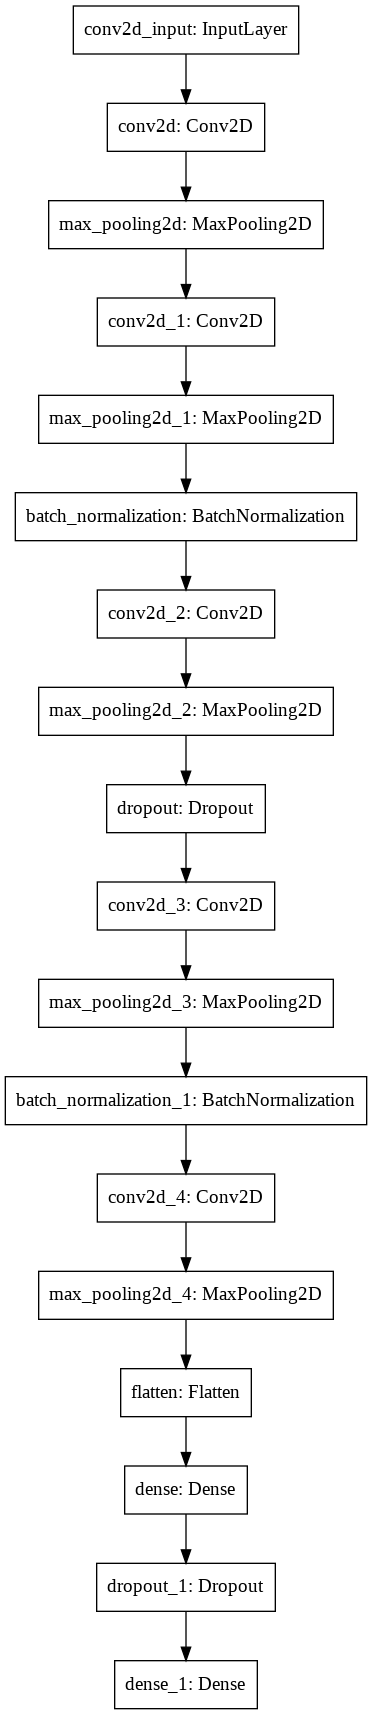

In [ ]:
plot_model(model, to_file='model.png')